In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import os

Главные параметры для извлечения удара сердца.

In [2]:
BEAT_LENGTH = 600 
ECG_CHANNEL = 1

In [3]:

gts = pd.read_csv("./train/train_gts.csv")
meta = pd.read_csv("./train/train_meta.csv")

df = meta.merge(gts, on='record_name', )
df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,record_name,group,myocard
0,9,18792.0,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-12-08 09:44:43,...,NaN,NaN,NaN,NaN,10,records100/00000/00009_lr,records500/00000/00009_hr,00009_hr,1,0
1,34,13619.0,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,1985-02-10 12:04:03,...,NaN,NaN,NaN,NaN,9,records100/00000/00034_lr,records500/00000/00034_hr,00034_hr,3,0
2,43,11315.0,25.0,1,NaN,63.0,2.0,0.0,CS-12 E,1985-03-14 09:38:53,...,NaN,NaN,NaN,NaN,8,records100/00000/00043_lr,records500/00000/00043_hr,00043_hr,3,0
3,52,18153.0,35.0,0,NaN,82.0,2.0,0.0,CS-12 E,1985-05-18 08:15:54,...,NaN,NaN,NaN,NaN,1,records100/00000/00052_lr,records500/00000/00052_hr,00052_hr,2,0
4,57,16063.0,26.0,0,NaN,93.0,2.0,0.0,CS-12 E,1985-06-06 11:32:43,...,NaN,NaN,NaN,NaN,10,records100/00000/00057_lr,records500/00000/00057_hr,00057_hr,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,21784,12488.0,66.0,1,NaN,NaN,0.0,0.0,CS100 3,2001-01-29 11:46:31,...,NaN,NaN,NaN,NaN,1,records100/21000/21784_lr,records500/21000/21784_hr,21784_hr,3,0
2097,21795,10162.0,68.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-01-31 17:30:42,...,NaN,NaN,NaN,NaN,4,records100/21000/21795_lr,records500/21000/21795_hr,21795_hr,3,0
2098,21825,11197.0,59.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-12 11:07:26,...,NaN,NaN,NaN,NaN,3,records100/21000/21825_lr,records500/21000/21825_hr,21825_hr,1,0
2099,21831,11905.0,55.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-28 12:49:25,...,NaN,NaN,NaN,NaN,9,records100/21000/21831_lr,records500/21000/21831_hr,21831_hr,3,0


In [4]:
df_test = pd.read_csv("./test/test_meta.csv")
df_test

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,record_name,group
0,127,11926.0,22.0,1,NaN,52.0,0.0,0.0,CS-12 E,1986-01-30 13:10:31,...,", I-AVR,",NaN,NaN,NaN,NaN,9,records100/00000/00127_lr,records500/00000/00127_hr,00127_hr,1
1,186,12396.0,60.0,1,NaN,NaN,NaN,3.0,AT-6 C,1986-03-19 14:07:42,...,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00186_lr,records500/00000/00186_hr,00186_hr,2
2,193,17536.0,28.0,0,NaN,112.0,0.0,0.0,CS-12 E,1986-03-22 09:24:13,...,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00193_lr,records500/00000/00193_hr,00193_hr,1
3,198,21074.0,19.0,1,NaN,59.0,0.0,0.0,CS-12 E,1986-04-18 10:52:02,...,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00198_lr,records500/00000/00198_hr,00198_hr,2
4,211,18690.0,85.0,1,NaN,NaN,1.0,2.0,CS-12,1986-05-19 10:15:08,...,", leicht,",NaN,NaN,NaN,NaN,3,records100/00000/00211_lr,records500/00000/00211_hr,00211_hr,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,21269,8951.0,44.0,0,NaN,NaN,1.0,2.0,CS-12,2000-08-15 13:20:54,...,NaN,NaN,NaN,NaN,NaN,1,records100/21000/21269_lr,records500/21000/21269_hr,21269_hr,1
445,21301,21392.0,71.0,0,NaN,NaN,0.0,0.0,CS100 3,2000-08-27 09:26:21,...,", I-AVF,",NaN,NaN,NaN,NaN,4,records100/21000/21301_lr,records500/21000/21301_hr,21301_hr,2
446,21366,17212.0,62.0,1,NaN,NaN,0.0,0.0,CS100 3,2000-09-18 09:06:20,...,NaN,NaN,NaN,NaN,NaN,2,records100/21000/21366_lr,records500/21000/21366_hr,21366_hr,1
447,21547,13332.0,40.0,0,NaN,NaN,0.0,0.0,CS100 3,2000-11-11 17:01:21,...,NaN,AVL,NaN,NaN,NaN,2,records100/21000/21547_lr,records500/21000/21547_hr,21547_hr,1


In [5]:
def load_record(record_name, is_train):
    if is_train:
        with open(f"./train/{record_name}.npy", "rb") as f:
            data  = np.load(f, allow_pickle=True)
    else:
        with open(f"./test/{record_name}.npy", "rb") as f:
            data  = np.load(f, allow_pickle=True)
    return data

def print_beat(x, y, ecg_channel):
    fig, ax = plt.subplots()  # Create a figure containing a single axes.
    ax.set_title(f"ECG channel {ecg_channel}")
    ax.plot(x, y)  # Plot some data on the axes.

Повторяю препроцессинг  из папиры[https://arxiv.org/pdf/1806.00794.pdf] для получения экг одного удара сердца

The steps used for extracting beats
from an ECG signal are as follows (see Fig. 1):
1) Splitting the continuous ECG signal to 10s windows and
select a 10s window from an ECG signal.
2) Normalizing the amplitude values to the range of be-
tween zero and one.
3) Finding the set of all local maximums based on zero-
crossings of the first derivative.
4) Finding the set of ECG R-peak candidates by applying
a threshold of 0.9 on the normalized value of the local
maximums.
5) Finding the median of R-R time intervals as the nominal
heartbeat period of that window (T ).
6) For each R-peak, selecting a signal part with the length
equal to 1.2T .
7) Padding each selected part with zeros to make its length
equal to a predefined fixed length.

In [6]:
#TODO: 
# 1. получения удара сердца хорошо работает не со всеми каналами
# 2. нужно или почистить изначальные данные или поменять алгоритм      
def extract_beat(record, to_print=False, ecg_channel=-1, BEAT_LENGTH=750, T_MULTIPLICATOR=1.2):
    """
        Extracts singular beats from single ecg_channel

        -----
        record_name - name from train_meta.csv
        ecg_channel - one of 12 possible ecg channels
        BEAT_LENGTH - predefined length, used for padding
        T_MULTIPLICATOR - used in original paper 
    """
    data = record[ecg_channel]
    data = data.reshape(-1,1) # reshaping for sklearn

    # normalize between 0 and 1
    data_norm = MinMaxScaler((0,1)).fit_transform(data).flatten()
    data = data.flatten()

    # find set of local maxima
    def find_local_maxima(arr):
        diff = np.diff(arr)  # Calculate the first derivative
        sign_changes = np.sign(diff)  # Analyze the sign changes
        #[3,2,1,-1,-2] - diff
        #[1,1,1,-1,-1] - sign_changes
        #[0, 0, -2, 0] - zero_crossings
        zero_crossings = np.diff(sign_changes)  # Find the zero-crossings

        indicies = (zero_crossings==-2).nonzero()[0] + 1 # we add 1, as diff skips first element
        return indicies

    maxima_inds = find_local_maxima(data_norm)
    maxima_vals = data_norm[maxima_inds]

    #get only those maximums, which value > 0.9 
    indicies_filtered = maxima_inds[(maxima_vals>0.9).nonzero()[0]] 
    if(len(indicies_filtered)==0):
        raise ValueError
    T = np.median(np.diff(indicies_filtered)) #  median time between beats
    T *= T_MULTIPLICATOR
    T = int(T) 

    if T>3000:
        raise ValueError
    beats = [] 
    for R_peak in indicies_filtered:
        if(R_peak+T>len(data_norm)):
            continue
        beat = data_norm[R_peak: R_peak+T]
        
        if(len(beat)>=BEAT_LENGTH):
            beat = beat[:BEAT_LENGTH]
        else:
            padding_zeros = np.array([0 for _ in range(BEAT_LENGTH-len(beat))])
            beat = np.hstack((beat, padding_zeros)) 
        
        beats.append(beat)
    
    if(len(beats)==0):
        raise ValueError 

    # choose the center beat 
    beats.sort(key = lambda x: len(x))
    #result_beat = beats[len(beats)//2] if(len(beats)>1) else beats[0]
    result_beat = beats[1] if(len(beats)>1) else beats[0]


    if to_print:
        print_beat([x for x in range(BEAT_LENGTH)], result_beat, ecg_channel)

    return np.array(result_beat)

Пытаюсь понять какой BEAT LENGTH выбрать
выбрал 600


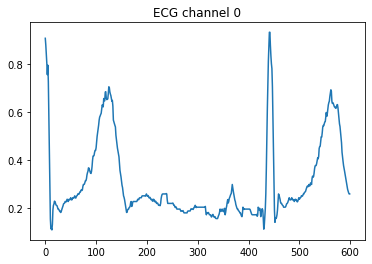

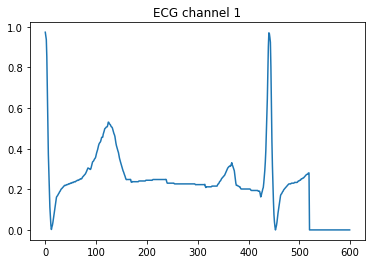

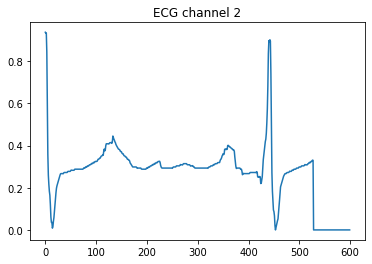

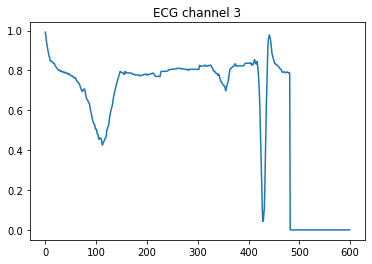

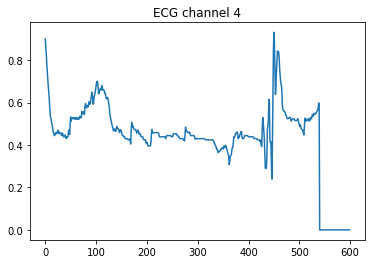

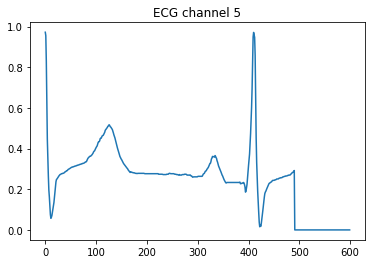

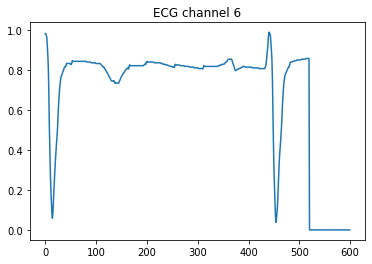

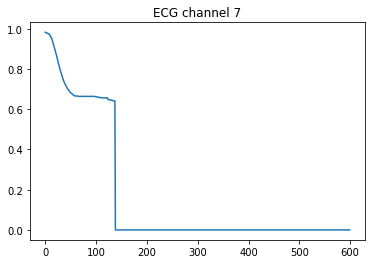

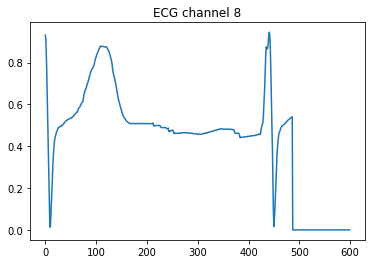

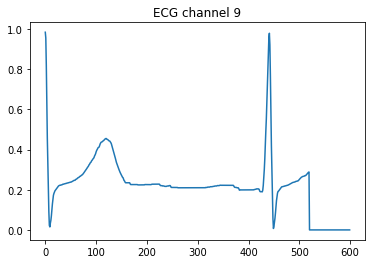

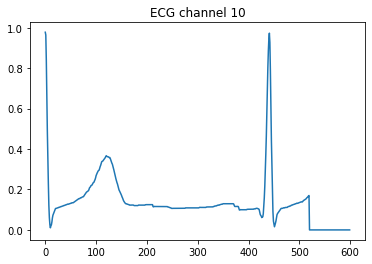

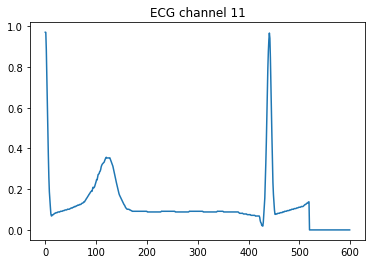

In [7]:
test_record_name = "00061_hr"
ecg = load_record(record_name=test_record_name, is_train=True)
for lead in range(12):
    beat = extract_beat(ecg, to_print=True, ecg_channel=lead, BEAT_LENGTH=BEAT_LENGTH)


In [8]:


def pipeline(df, is_train):
    """
    1. Extracts one beat from the last channel of ecg files 
    2. Saves these beats as a new file
    """
    
    record_names = df['record_name'].to_list()

    result_df = df
    result_df['correct_transformation'] = True # sometimes beat extraction doesn't work 
    for record_name in record_names:
        beats = []
        try:
            record = load_record(record_name, is_train=is_train)
            for channel in range(12):
                extracted_beat = extract_beat(record, to_print=False, ecg_channel=channel, BEAT_LENGTH=BEAT_LENGTH)
                beats.append(extracted_beat)
        except ValueError:
            result_df.loc[result_df['record_name']==record_name, 'correct_transformation'] = False
            continue
         
        if is_train: 
            if(not os.path.exists("./transformed_train/")):
                os.mkdir("./transformed_train/")
            np.save(f"./transformed_train/{record_name}.npy", beats) 
        else:
            if(not os.path.exists("./transformed_test/")):
                os.mkdir("./transformed_test/")
            np.save(f"./transformed_test/{record_name}.npy", beats) 

    return result_df

In [9]:
from sklearn.preprocessing import Normalizer

def pipeline_annotations(df, is_train):

    
    ## Очень много столбцов, где заполнено меньше 1% значений, 
    ## поэтому я решил соединить их в "суперклассы", которые находятся в scp_statements.csv
    
    # expand dicts into separate columns
    scp_codes = df['scp_codes'].map(eval).apply(pd.Series)
    scp_codes.merge
    print(len(scp_codes.columns))
    # percentage of non nan values
    print((scp_codes.notna().sum()/len(scp_codes)).sort_values(ascending=False).iloc[:15])
    (scp_codes.notna().sum()).sort_values(ascending=False).iloc[:15]   

    ## Все столбцы, где нет значения 'diagnostic class' - это abnormalities(так написано в столбце 'description')

    scp_codes_description = pd.read_csv('./scp_statements.csv')
    scp_codes_description = scp_codes_description.rename(columns={'Unnamed: 0': 'code'})

    print("количество кодов",len(scp_codes_description))
    superclasses = scp_codes_description\
        .groupby('diagnostic_class')['code'].unique().to_dict()
    # these are codes for different abnormalities
    abnormalities = scp_codes_description['code']\
        [scp_codes_description['diagnostic_class'].isna()].values
    superclasses['abnormalities'] = abnormalities
    print("словарь суперклассов",superclasses)

    for superclass, columns in superclasses.items():
        columns = [col.strip() for col in columns]

        for code in columns:
            if code not in scp_codes.columns:
                columns.remove(code)

        scp_codes[superclass] = scp_codes[columns].sum(axis=1)
        scp_codes=scp_codes.drop(columns=columns)

    superclasses["NORM"] = []

    df = df.merge(scp_codes, left_index=True, right_index=True)

    ## Это написано в ридми датасета 
    ## Records in fold 9 and 10 underwent at least one human evaluation and are therefore of a particularly high label quality.
    ## We therefore propose to use folds 1-8 as training set, fold 9 as validation set and fold 10 as test set.


    # normalize values
    values = df[['CD', "HYP", "MI", "STTC", 'abnormalities']].values 
    df[['CD', "HYP", "MI", "STTC", 'abnormalities']] = Normalizer().fit_transform(values)

    ## убираем строки, где некорректно прошло извлечение бита из экг
    annotations = df[df['correct_transformation']==True] 

    #TODO: воспользоваться все таки, сверху написанным, вместо колонки 'myocard'
    annotations = annotations[['record_name', 'strat_fold','myocard']]   


    val_annotations = annotations[annotations['strat_fold'].isin([8, 9, 10])]
    train_annotations = annotations[annotations['strat_fold'].isin(range(1,8))]
    val_annotations.to_csv('./val_annotations.csv', index=False)
    train_annotations.to_csv('./train_annotations.csv', index=False)

    print("validation percentage:",len(val_annotations) / len(annotations))
    print("train percentage:",len(train_annotations) / len(annotations))
    print("VALIDATION", val_annotations["myocard"].value_counts(normalize=True))
    print("TTRAIN", train_annotations["myocard"].value_counts(normalize=True))


In [10]:

from tqdm.notebook import tqdm
class Transformator():
    def __init__(self,args, is_train):
        self.is_train = is_train
        self.args = args
    
    def run_pipeline(self, transformation_func, df):
        result_df = self.pipeline_ecg(transformation_func, df)
        self.pipeline_annotations(result_df)

    # transformation func - function that transforms record to any 
    def pipeline_ecg(self, transformation_func, df):

        # рекорды с миокардом дублируются дважды и к названиям добавляются cyффиксы _1, _2
        # делается чтобы оверсемплить сэмплы с миокардом, потому что имбаланс.
        duplicated_rows = df[df['myocard'] == 1].copy()

        # Add a suffix to 'record_name' column for the duplicated rows
        duplicated_rows['record_name'] = duplicated_rows['record_name'] + '_1'

        # Duplicate the rows again and add a different suffix
        duplicated_rows_2 = duplicated_rows.copy()
        duplicated_rows_2['record_name'] = duplicated_rows_2['record_name'].str.replace(
            '_1', '_2')

        # Append the duplicated rows to the original DataFrame
        result_df = pd.concat([df, duplicated_rows, duplicated_rows_2], ignore_index=True)

        record_names = result_df[result_df['myocard']==1]['record_name'].to_list()
        result_df['correct_transformation'] = True 
        for record_name in tqdm(record_names):
            if(record_name[-2]!="_"):
                continue
            transformed = transformation_func(record_name, **self.args)
            # try:
            #     transformed = transformation_func(record_name, **self.args)
            # except Exception:
            #     print("Exception during transforming")
            #     result_df.loc[result_df['record_name']==record_name, 'correct_transformation'] = False
            #     continue
            
            if self.is_train: 
                if(not os.path.exists("./transformed_train/")):
                    os.mkdir("./transformed_train/")
                np.save(f"./transformed_train/{record_name}.npy", transformed) 
            else:
                if(not os.path.exists("./transformed_test/")):
                    os.mkdir("./transformed_test/")
                np.save(f"./transformed_test/{record_name}.npy", transformed) 

        return result_df 

    def pipeline_annotations(self, df):

        
        ## Очень много столбцов, где заполнено меньше 1% значений, 
        ## поэтому я решил соединить их в "суперклассы", которые находятся в scp_statements.csv
        
        # expand dicts into separate columns
        scp_codes = df['scp_codes'].map(eval).apply(pd.Series)
        scp_codes.merge
        print(len(scp_codes.columns))
        # percentage of non nan values
        print((scp_codes.notna().sum()/len(scp_codes)).sort_values(ascending=False).iloc[:15])
        (scp_codes.notna().sum()).sort_values(ascending=False).iloc[:15]   

        ## Все столбцы, где нет значения 'diagnostic class' - это abnormalities(так написано в столбце 'description')

        scp_codes_description = pd.read_csv('./scp_statements.csv')
        scp_codes_description = scp_codes_description.rename(columns={'Unnamed: 0': 'code'})

        print("количество кодов",len(scp_codes_description))
        superclasses = scp_codes_description\
            .groupby('diagnostic_class')['code'].unique().to_dict()
        # these are codes for different abnormalities
        abnormalities = scp_codes_description['code']\
            [scp_codes_description['diagnostic_class'].isna()].values
        superclasses['abnormalities'] = abnormalities
        print("словарь суперклассов",superclasses)

        for superclass, columns in superclasses.items():
            columns = [col.strip() for col in columns]

            for code in columns:
                if code not in scp_codes.columns:
                    columns.remove(code)

            scp_codes[superclass] = scp_codes[columns].sum(axis=1)
            scp_codes=scp_codes.drop(columns=columns)

        superclasses["NORM"] = []

        df = df.merge(scp_codes, left_index=True, right_index=True)

        ## Это написано в ридми датасета 
        ## Records in fold 9 and 10 underwent at least one human evaluation and are therefore of a particularly high label quality.
        ## We therefore propose to use folds 1-8 as training set, fold 9 as validation set and fold 10 as test set.


        # normalize values
        values = df[['CD', "HYP", "MI", "STTC", 'abnormalities']].values 
        df[['CD', "HYP", "MI", "STTC", 'abnormalities']] = Normalizer().fit_transform(values)

        ## убираем строки, где некорректно прошло извлечение бита из экг
        annotations = df[df['correct_transformation']==True] 

        #TODO: воспользоваться все таки, сверху написанным, вместо колонки 'myocard'
        annotations = annotations[['record_name', 'strat_fold','myocard']]   


        val_annotations = annotations[annotations['strat_fold'].isin([8, 9, 10])]
        train_annotations = annotations[annotations['strat_fold'].isin(range(1,8))]
        val_annotations.to_csv('./val_annotations.csv', index=False)
        train_annotations.to_csv('./train_annotations.csv', index=False)

        print("validation percentage:",len(val_annotations) / len(annotations))
        print("train percentage:",len(train_annotations) / len(annotations))
        print("VALIDATION", val_annotations["myocard"].value_counts(normalize=True))
        print("TTRAIN", train_annotations["myocard"].value_counts(normalize=True))


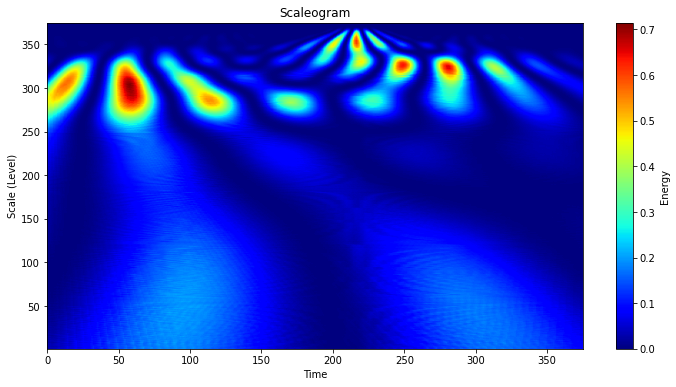

array([[[-2.90684402e-04,  1.05583714e-02,  1.35505002e-03, ...,
         -9.82095808e-05,  2.90783442e-04,  4.66529513e-03],
        [ 5.53079939e-04, -1.51522886e-02,  1.52781028e-02, ...,
         -2.51767086e-03,  6.34236680e-03, -6.54553343e-03],
        [ 1.59114052e-03, -2.60536652e-02,  2.63305992e-04, ...,
          7.96504412e-03,  5.91912190e-04, -1.28249386e-02],
        ...,
        [ 1.66984513e-01,  1.67336762e-01,  1.76260531e-01, ...,
         -2.92735755e-01, -2.85465032e-01, -2.87651092e-01],
        [ 1.64052114e-01,  1.76063240e-01,  1.96846396e-01, ...,
         -3.11627537e-01, -2.98319638e-01, -3.00106317e-01],
        [ 1.42370760e-01,  1.60037532e-01,  1.81425586e-01, ...,
         -2.93896943e-01, -2.82691568e-01, -2.84396380e-01]],

       [[-5.88434190e-03,  6.97781816e-02,  2.06151996e-02, ...,
         -4.17471456e-05,  4.31019638e-04,  7.25222332e-03],
        [ 9.85778123e-03, -9.48169231e-02,  9.00602043e-02, ...,
         -4.03126935e-03,  1.00260768e

In [11]:
from transforming_wavelets import pipeline
pipeline('00009_hr', prefix="./train/", segment_num=1, test=True)

In [12]:
transformator = Transformator(args={'prefix':'./train/', 'segment_num':1}, is_train=True)
transformator.run_pipeline(pipeline, df)

  0%|          | 0/1245 [00:00<?, ?it/s]

69
SR       0.732515
NORM     0.345616
ABQRS    0.237120
ASMI     0.204367
IMI      0.202320
LVH      0.108154
AFIB     0.090413
LAFB     0.084272
NDT      0.076424
ISC_     0.071307
STD_     0.059024
PVC      0.052883
IRBBB    0.050836
QWAVE    0.048106
VCLVH    0.042989
dtype: float64
количество кодов 71
словарь суперклассов {'CD': array(['LAFB', 'IRBBB', '1AVB', 'IVCD', 'CRBBB', 'CLBBB', 'LPFB', 'WPW',
       'ILBBB', '3AVB', '2AVB'], dtype=object), 'HYP': array(['LVH', 'LAO/LAE', 'RVH', 'RAO/RAE', 'SEHYP'], dtype=object), 'MI': array(['IMI', 'ASMI', 'ILMI', 'AMI', 'ALMI', 'INJAS', 'LMI', 'INJAL',
       'IPLMI', 'IPMI', 'INJIN', 'INJLA', 'PMI', 'INJIL'], dtype=object), 'NORM': array(['NORM'], dtype=object), 'STTC': array(['NDT', 'NST_', 'DIG', 'LNGQT', 'ISC_', 'ISCAL', 'ISCIN', 'ISCIL',
       'ISCAS', 'ISCLA', 'ANEUR', 'EL', 'ISCAN'], dtype=object), 'abnormalities': array(['ABQRS', 'PVC', 'STD_', 'VCLVH', 'QWAVE', 'LOWT', 'NT_', 'PAC',
       'LPR', 'INVT', 'LVOLT', 'HVOLT', 'TAB_

In [13]:
df[df['record_name']=="00009_hr"]["myocard"].values[0]

0

In [14]:
res_df_train['correct_transformation'].value_counts()

NameError: name 'res_df_train' is not defined

In [ ]:
res_df_test['correct_transformation'].value_counts()